# NCBI id to Ensemble id

In [39]:
import csv
import pandas as pd
import numpy as np
from Bio import Entrez
import matplotlib_venn

In [40]:
xls = pd.read_excel("Negative_Positive_genes.xlsx", sheet_name=1)
NCBI_id = xls["gene id"].astype(str).to_list()

In [41]:
print(f'There are {len(NCBI_id)} negative genes')

There are 1189 negative genes


In [42]:
xls.head(10)

,gene id,symbol
0,10002,NR2E3
1,10008,KCNE3
2,100133941,CD24
3,10019,SH2B3
4,10020,GNE
5,10021,HCN4
6,10046,MAMLD1
7,100506658,OCLN
8,10060,ABCC9
9,10083,USH1C


In [43]:
# check null values
xls.isnull().sum()

gene id    0
symbol     0
dtype: int64

# G Profiler

In [44]:
xls['symbol']= xls['symbol'].astype(str)
xls

,gene id,symbol
0,10002,NR2E3
1,10008,KCNE3
2,100133941,CD24
3,10019,SH2B3
4,10020,GNE
...,...,...
1184,9939,RBM8A
1185,9950,GOLGA5
1186,999,CDH1
1187,9992,KCNE2


In [45]:
from gprofiler import GProfiler

gp = GProfiler(return_dataframe=True)
gp_convert_df =gp.convert(organism  = 'hsapiens',
                            query= xls['symbol'].to_list(),
                                target_namespace= 'ENSG')
gp_convert_df

,incoming,converted,n_incoming,n_converted,name,description,namespaces,query
0,NR2E3,ENSG00000278570,1,1,NR2E3,nuclear receptor subfamily 2 group E member 3 ...,"ENTREZGENE,GENECARDS,HGNC,UNIPROT_GN,WIKIGENE",query_1
1,KCNE3,ENSG00000175538,2,1,KCNE3,potassium voltage-gated channel subfamily E re...,"ENTREZGENE,GENECARDS,HGNC,UNIPROT_GN,WIKIGENE",query_1
2,CD24,ENSG00000272398,3,1,CD24,CD24 molecule [Source:HGNC Symbol;Acc:HGNC:1645],"ENTREZGENE,GENECARDS,HGNC,UNIPROT_GN,WIKIGENE",query_1
3,SH2B3,ENSG00000111252,4,1,SH2B3,SH2B adaptor protein 3 [Source:HGNC Symbol;Acc...,"ENTREZGENE,GENECARDS,HGNC,UNIPROT_GN,WIKIGENE",query_1
4,GNE,ENSG00000159921,5,1,GNE,glucosamine (UDP-N-acetyl)-2-epimerase/N-acety...,"ENTREZGENE,GENECARDS,HGNC,UNIPROT_GN,WIKIGENE",query_1
...,...,...,...,...,...,...,...,...
1199,RBM8A,ENSG00000265241,1185,1,RBM8A,RNA binding motif protein 8A [Source:HGNC Symb...,"ENTREZGENE,GENECARDS,HGNC,UNIPROT_GN,WIKIGENE",query_1
1200,GOLGA5,ENSG00000066455,1186,1,GOLGA5,golgin A5 [Source:HGNC Symbol;Acc:HGNC:4428],"ENTREZGENE,GENECARDS,HGNC,UNIPROT_GN,WIKIGENE",query_1
1201,CDH1,ENSG00000039068,1187,1,CDH1,cadherin 1 [Source:HGNC Symbol;Acc:HGNC:1748],"ENTREZGENE,GENECARDS,HGNC,UNIPROT_GN,WIKIGENE",query_1
1202,KCNE2,ENSG00000159197,1188,1,KCNE2,potassium voltage-gated channel subfamily E re...,"ENTREZGENE,GENECARDS,HGNC,UNIPROT_GN,WIKIGENE",query_1


In [46]:
gp_convert_df["incoming"].value_counts().head(10)

MKKS        3
SMN1        2
HPS1        2
FOXP3       2
HLA-DQA1    2
HBA2        2
HBA1        2
CARD9       2
SMN2        2
TREX1       2
Name: incoming, dtype: int64

In [47]:
a= gp_convert_df[gp_convert_df["incoming"]=='MKKS']
a

,incoming,converted,n_incoming,n_converted,name,description,namespaces,query
1073,MKKS,ENSG00000125863,1062,1,MKKS,MKKS centrosomal shuttling protein [Source:HGN...,"ENTREZGENE,GENECARDS,HGNC,UNIPROT_GN,WIKIGENE",query_1
1074,MKKS,ENSG00000285508,1062,2,MKKS,MKKS centrosomal shuttling protein [Source:NCB...,"ENTREZGENE,GENECARDS,HGNC,UNIPROT_GN,WIKIGENE",query_1
1075,MKKS,ENSG00000285723,1062,3,MKKS,MKKS centrosomal shuttling protein [Source:NCB...,"ENTREZGENE,GENECARDS,HGNC,UNIPROT_GN,WIKIGENE",query_1


## Compare the NCBI dataset with the Ensemble dataset

In [48]:
sfari= pd.read_csv("sfari_ed_01_16_2024.csv")
sfari= sfari["ensembl-id"]

In [51]:
positive= set(sfari)
negative= set(gp_convert_df["converted"])

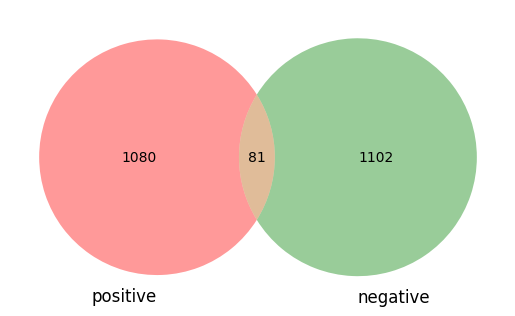

In [53]:
matplotlib_venn.venn2([positive, negative ], set_labels=["positive", "negative" ])

In [54]:
cross =positive & negative
len(cross)

81

In [55]:
negative= negative - cross

positive=pd.DataFrame(positive)
positive["y"]=1
negative=pd.DataFrame(negative)
negative["y"]=0

gene_list= pd.concat([positive, negative])
gene_list.columns=["gene", "y"]
gene_list.head(11)

,gene,y
0,ENSG00000126012,1
1,ENSG00000148219,1
2,ENSG00000121653,1
3,ENSG00000124942,1
4,ENSG00000189108,1
5,ENSG00000106689,1
6,ENSG00000198689,1
7,ENSG00000133958,1
8,ENSG00000131711,1
9,ENSG00000172554,1


In [57]:
gene_list.to_csv("gene_list_01_16_2024.csv", index=False)